# The Sentiment Scout, The Business Frontier
### _A project for Aspect Based Sentiment Analysis of customer experience_
___________________________________________________________________________________________________________________

**Abstract:** In today's competitive landscape, understanding customer sentiment is paramount across diverse industries. However, the abundance of unstructured customer reviews presents a significant challenge for businesses seeking actionable insights. Traditional manual analysis methods prove time-consuming and biased. <br>

This project addresses these challenges by implementing Sentiment Analysis to automate sentiment understanding and aspect extraction. Through meticulous building blocks including data pre-processing, feature engineering, and model training, we evaluated three models. <br>

Our analysis reveals that the Multinomial Naive Bayes model emerged as the top performer, achieving an accuracy of 79.34%. This research underscores the importance of sentiment analysis in informing business strategies and provides practical insights for organizations aiming to leverage customer feedback for enhanced decision-making and customer satisfaction. <br>

#### Problem Synopsis:

_The customer’s perception is your reality. – <font color='blue'>Kate Zabriskie_ </font><br>

In a world where consumer opinions shape the success of businesses, there is a silent battleground across diverse industries. In the realm of business, from the sizzle of fast-food chains to the runway of fashion empires, understanding customer sentiment is paramount. The challenge lies in deciphering the large unstructured customer reviews scattered across different platforms. Businesses are inundated with an abundance of reviews ranging from glowing endorsements to harsh criticisms, making it difficult to extract actionable insights. <br>

Traditional methods of manually analyzing the reviews are time consuming and often prone to bias. By implementing the Sentiment Analysis, we aim to automate the process of understanding customer sentiment along with the aspects.<br>

#### Application:

- Transforming this customer feedback into a strategic asset that can empower businesses to thrive in an increasingly competitive market landscape. <br>

- This can help businesses focus and improve on the aspects where they failed to gain positive sentiment from the customers.<br>

#### Scope and Objective:

This project is about sentiment analysis of customer reviews about products or service purchased. Considering the data set of reviews about a restaurant in the United States of America to train the machine learning model to analyze and identify the sentiment present in the textual content.  <br> 

Customers may review a service or product based on different aspects or factors. The review could be about the staff, quality of service, price, ambience or cleanliness. In this project, we will analyze the customer reviews and find the sentiment polarity of each review and classify it into different classes i.e., positive, neutral and negative towards the aspect or factor mentioned in the review (aspect towards which the sentiment was expressed) <br>

The model is trained using the reviews, aspects and it’s associated sentiments, this model can then be generalized against unseen textual data like reviews or feebacks given by the customers.  <br>

#### Building Block of the Model: 
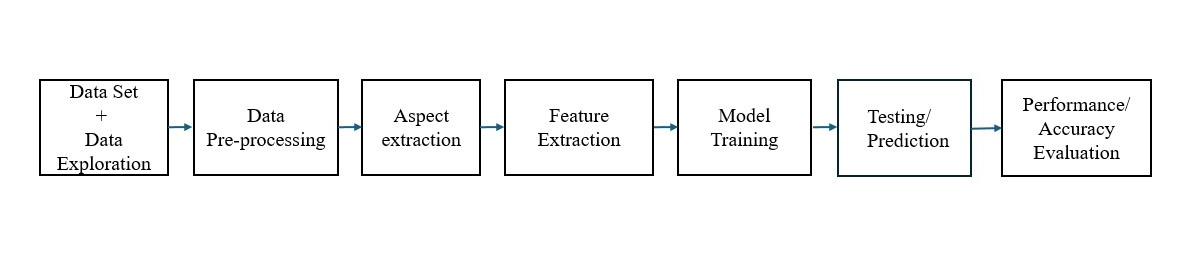

**Importing the necessary libararies**

In [1]:
#Importing necessary libarary for the analysis and prediction
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import re
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from joblib import Parallel, delayed
import nltk
import nltk
nltk.download('vader_lexicon')
nltk.download('averaged_perceptron_tagger')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('wordnet')
nltk.download('punkt')
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import FeatureUnion, Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from tqdm import tqdm
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/anvithahiriadka/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/anvithahiriadka/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/anvithahiriadka/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/anvithahiriadka/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


**Step 1:**<br>
### Data Set

Loading the Dataset.<br>
The dataset used here is of reviews of Mc Donald’s Stores in the United States of America, scraped from Google Reviews. <br>
This extensive dataset comprises 33,396 reviews, offering a rich repository of customer experiences and opinions regarding different McDonald's locations nationwide. Within this dataset, you will find a comprehensive array of information including reviewer ID, store name, category, store address, latitude, longitude, rating count, review time, as well as detailed reviews and ratings. This data set serves as a valuable resource for gaining deep insights into customer sentiments and perceptions, enabling comprehensive analysis and informed decision-making for various stakeholders within the organization. <br>

***Key Features in data set:***<br>

reviewer_id: Unique identifier for each reviewer (anonymized) <br>

store_name: Name of the McDonald's store <br>

category: Category or type of the store <br>

store_address: Address of the store <br>

latitude: Latitude coordinate of the store's location <br>

longitude: Longitude coordinate of the store's location <br>

rating_count: Number of ratings/reviews for the store <br>

review_time: Timestamp of the review <br>

review: Textual content of the review <br>

rating: Rating provided by the reviewer <br>

In [2]:
#Loading the data set
URL = "McDonalds_Reviews.csv"
df = pd.read_csv(URL, encoding='latin-1')

### Data Exploration
The data set contains ten different features, the most useful features among these which are relevant for the sentiment analysis are ‘review’ and ‘rating’. This would facilitate generating a meaningful insight called ‘sentiment polarity’. <br>

The data used here is mostly textual content which requires natural language processing before it is passed to the machine learning model. The only feature that is considered here in this case which is discrete in nature is the feature ‘rating’. This feature ‘rating’ is later used to derive sentiments based on the threshold set. <br>

Visualizing the distribution of ratings given by the customers to the restaurant using barplot. This helps us understand how ratings are distributed across different categories (e.g., 1 star, 2 stars, 3 stars, 4 stars, 5 stars). <br>

The ratings distribution in data set is as follows: <br>

In [3]:
#Size of the data frame
print(f"The Shape of the dataframe = {df.shape}")
print(f"The number of Rows in the dataframe = {df.shape[0]}")
print(f"The number of Columns in the dataframe = {df.shape[1]}")

The Shape of the dataframe = (33396, 10)
The number of Rows in the dataframe = 33396
The number of Columns in the dataframe = 10


In [4]:
#Printing the first five samples of the dataframe
df.head(5)

,reviewer_id,store_name,category,store_address,latitude,longitude,rating_count,review_time,review,rating
0,1,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",3 months ago,Why does it look like someone spit on my food?...,1 star
1,2,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,It'd McDonalds. It is what it is as far as the...,4 stars
2,3,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,Made a mobile order got to the speaker and che...,1 star
3,4,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",a month ago,My mc. Crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿...,5 stars
4,5,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",2 months ago,"I repeat my order 3 times in the drive thru, a...",1 star


Extracting the two features <b>'review'</b> and <b>'rating'</b> from the data frame for sentiment analysis

In [5]:
#copying the 2 features of the dataframe to a new variable
main_data = df[['review','rating']].copy()

<b>Visualizing the distribution of rating feature of the dataframe using barplot</b><br>
This will help us understand how ratings are distributed across different categories (e.g., 1 star, 2 stars, 3 stars, 4 stars, 5 stars). 

<function matplotlib.pyplot.show(close=None, block=None)>

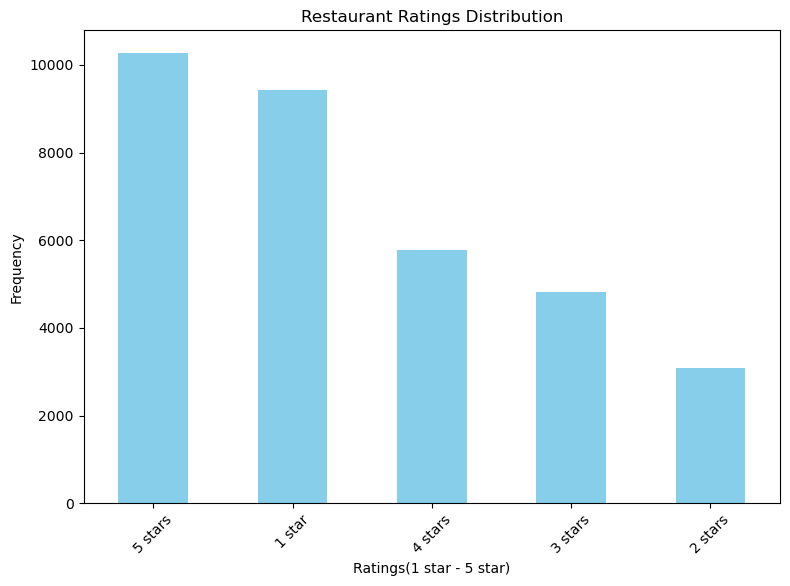

In [6]:
count_category = main_data['rating'].value_counts()
plt.figure(figsize=(8,6))
count_category.plot(kind='bar', color='skyblue')
plt.title("Restaurant Ratings Distribution")
plt.xlabel("Ratings(1 star - 5 star)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.xticks(rotation=45)
plt.show

<b><font color="green">Inference: </b><br>
    <b>Rating Analysis:</b>
    From the above bar plot for the ratings column of the data frame, we can infer that the restaurent has received <b><font color="green">5 star rating from more than 10000 customers</b>.----> indicating Postive Sentiment Polarity.<br>
    Also, nearly <b><font color="red"> 9000+ customers gave a review of 1 Star rating</b> ----> indicating Negative 
    Sentiment Polarity<br>
    Overall, considering the normal rating scale association with Sentiments, the bar plot above shows the rating frequency as follows:
    Out of total 33396 customer reviews:<br>
    Positive: Ratings of 4 or 5 stars > 15000<br>
    Neutral: Ratings of 3 stars > 4000<br>
    Negative: Ratings of 1 or 2 stars >  12000<br>
    This shows that the probability of the postive sentiment polarity based on the ratings appears to be large.
  

**Step 2**
### Data Pre-Processing

Standardization is a very essential part of data pre-processing. In this case of processing the reviews of restaurant, there is high possibility for the content of the review to be diverse and noisy. It may contain spelling errors, abbreviations, punctuation, emoticons, capitalization. These affect the text data quality. <br>

From observing the ‘review’ feature in the dataframe, we can conclude that are many noises and irrelevant characters in the reviews. The dataset must be cleaned and pre-processed before it is sent to the machine learning model. Therefore, Standardization needs to be performed for the text content [Reviews]. <br>

In this context, we will use some of the popular toolkit and libraries for further pre-processing steps. <br>

Toolkits and Libraries used: <br>

1) <b>Natural Language ToolKit (NLTK) </b><br>

Natural Language ToolKit (NLTK) platform provides comprehensive python libraries for Natural Language Processing (NLP), which offers libraries for text preprocessing such as lemmatization, and POS Tagging.  <br>

2) <b>spaCy </b><br>

spaCy is another fast Python library used for NLP (Natural Language Processing) that provides a pipeline approach for text preprocessing, supporting tasks like tokenization, Stop Word removal, lemmatization and part-of-speech tagging. <br>

Below is the list of text pre-processing done on the ‘Review’ feature of the dataframe using above mentioned tools.<br>  

- Data cleaning (Removing duplicate and Missing values) <br>

- Case folding <br>

- Noise removal – Removed using Regular Expression <br>

- Stop-word removal <br>

- Tokenization <br>

- Lemmatization <br>

<b> 2a) Data cleaning</b>

1) Cheking for duplicate entries
2) Checking for the missing values across the column of the dataframe

In [7]:
#Checking for Duplicate entries
print(f"Duplicate entries = {df.duplicated().sum()}")

Duplicate entries = 0


In [8]:
#Checking for missing values
print("Missing values")
main_data.isnull().sum()

Missing values


review    0
rating    0
dtype: int64

<b><font color='green'>Inference 2a)<font color='green'></b><br>
The above results shows that there are no duplicates and no missing values in the dataframe.

<b> 2b) Removing the 'star' and 'stars' string from the column rating to make the 'rating' a numerical column whose value ranges from 1-5</b><br>
This will help in deriving the sentiment polarity for each review sample. 

In [9]:
#Removing the 'star' and 'stars' string from the rating feature of the data frame
main_data['rating'] = main_data['rating'].apply(lambda x: int (x.split()[0]))
main_data.head(5)

,review,rating
0,Why does it look like someone spit on my food?...,1
1,It'd McDonalds. It is what it is as far as the...,4
2,Made a mobile order got to the speaker and che...,1
3,My mc. Crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿...,5
4,"I repeat my order 3 times in the drive thru, a...",1


<b>  2c) Case folding</b><br>
Converting all the Text in the review column to lower case to ensure consistency in text processing and help avoid issues related to case sensitivity during analysis and modelling.

In [10]:
#Converting the review feature text to lower case
main_data['review'] = main_data['review'].str.lower()
main_data['review']

0        why does it look like someone spit on my food?...
1        it'd mcdonalds. it is what it is as far as the...
2        made a mobile order got to the speaker and che...
3        my mc. crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿...
4        i repeat my order 3 times in the drive thru, a...
                               ...                        
33391                          they treated me very badly.
33392                             the service is very good
33393                           to remove hunger is enough
33394    it's good, but lately it has become very expen...
33395                            they took good care of me
Name: review, Length: 33396, dtype: object

**2d) Noise, Stop word removal and Tokenization**<br>
<b>Noise Removal </b><br> 
Removing unwanted characters such as punctuation, irrelevant characters, emoticons, extra white spaces, etc. Using regular expressions. <br>

<b>Stop word removal </b><br>
Removing stop words, which are common words that occur frequently in the sentence, and it does not hold much semantic meaning (Example: “The”, “is”, “of”, etc.). <br>
Using pre-trained model(en_core_web_sm) from spaCy Library, for Stop word removal of 'review' feature of the dataframe<br>

<b>Tokenization</b> <br>
Choosing the spacy method, as it provides high performance tokenization. Here the entire review is broken down into words (Tokens). <br>

 
<font color='red'>Note: The below code execution takes 4 Minutes approximately.

In [11]:
#Noise Removal function using Regular Expression 
def remove_noise(text):
    #Substitutes any character other than lower/upper case character or whitespace with a empty string
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    #Removes extra whitespace by substituting sequences of one or more whitespace characters (\s+) with a single space
    text = re.sub(r'\s+', ' ', text).strip()
    return text

#Loading pre-trained model(en_core_web_sm) from spaCy to remove stop words and tokenize the text 
nlp = spacy.load("en_core_web_sm")
#Stop Word Removal and Tokenization
def remove_stop_words(text):
    #Processing the text using spaCy Pipeline 
    doc = nlp(text)
    #Iteration over each token to check if the token's text is not in the. set of STOP WORDS.
    tokens_without_stopwords = [token.text for token in doc if token.text not in STOP_WORDS]
    return tokens_without_stopwords


# Apply noise removal and stop word removal to the review column
def process_review(row):
    review = row['review']
    review = remove_noise(review)
    review = remove_stop_words(review)
    return review

# Wrap the DataFrame operation with tqdm to monitor the progress
tqdm.pandas()
main_data['review'] = main_data.progress_apply(process_review, axis=1)

print("Noise Removal, Stop Word Removal and Tokenization Completed!!!")

100%|████████████████████████████████████| 33396/33396 [04:13<00:00, 131.98it/s]

Noise Removal, Stop Word Removal and Tokenization Completed!!!


In [12]:
#Data frame after Noise removal, Stop Word removal and Tokenization 
print("Data Frame after Noise removal, Stop Word removal and Tokenization ")
main_data

Data Frame after Noise removal, Stop Word removal and Tokenization 


,review,rating
0,"[look, like, spit, food, normal, transaction, ...",1
1,"[d, mcdonalds, far, food, atmosphere, staff, d...",4
2,"[mobile, order, got, speaker, checked, line, m...",1
3,"[mc, crispy, chicken, sandwich, customer, serv...",5
4,"[repeat, order, times, drive, manage, mess, su...",1
...,...,...
33391,"[treated, badly]",1
33392,"[service, good]",5
33393,"[remove, hunger]",4
33394,"[good, lately, expensive]",5


In [13]:
#Copying the data frame
clean_data = main_data.copy()
clean_data

,review,rating
0,"[look, like, spit, food, normal, transaction, ...",1
1,"[d, mcdonalds, far, food, atmosphere, staff, d...",4
2,"[mobile, order, got, speaker, checked, line, m...",1
3,"[mc, crispy, chicken, sandwich, customer, serv...",5
4,"[repeat, order, times, drive, manage, mess, su...",1
...,...,...
33391,"[treated, badly]",1
33392,"[service, good]",5
33393,"[remove, hunger]",4
33394,"[good, lately, expensive]",5


**2e) Lemmatization**<br>
Using NLTK’s(Natural Language Toolkit) WordNetLemmatizer() for lemmatization<br>
Performing Lemmatization to reduce the words into their dictionary forms or lemma. This step normalizes the text further. <br>

In [14]:
lemmatizer = WordNetLemmatizer()
#Defining a function to perform lemmatization
def lemmatize_words(word_list):
    return [lemmatizer.lemmatize(word) for word in word_list]
# Apply lemmatization to the 'tokens_without_stopwords' column
clean_data['review'] = clean_data['review'].apply(lemmatize_words)
print("Review feature after Lemmatization Processing")
clean_data

Review feature after Lemmatization Processing


,review,rating
0,"[look, like, spit, food, normal, transaction, ...",1
1,"[d, mcdonalds, far, food, atmosphere, staff, d...",4
2,"[mobile, order, got, speaker, checked, line, m...",1
3,"[mc, crispy, chicken, sandwich, customer, serv...",5
4,"[repeat, order, time, drive, manage, mess, sup...",1
...,...,...
33391,"[treated, badly]",1
33392,"[service, good]",5
33393,"[remove, hunger]",4
33394,"[good, lately, expensive]",5


**Note:<br>
After the above pre-processing step, re-checking the data for any missing values**

In [15]:
clean_data.isnull().sum()

review    0
rating    0
dtype: int64

### Feature Engineering 

This step involves deriving target variables (sentiment) and a feature variable(aspects).  

Target variables ‘sentiment’ is derived from the feature ‘review’ and the target variable ‘rating_sentiment’ is derived from feature ‘rating’. This will provide us with target variables having sentiment polarity classes positive, neutral and negative. 

Aspect extraction is done for extracting top aspects from each review. Identifying the most common aspects or features discussed in positive, negative, and neutral reviews. 

<b>1) Sentiment Classification [Target Variables]</b><br>

This is a crucial step here in Data Pre-processing as we are deriving the sentiment class for every review sample.<br>
Deriving the Sentiments for each review text in the data frame, using **Natural Language Processing Tool kit's(NLTK)** pre-trained model sentiment analyser called **"Vader"**.<br>
- VADER belongs to a kind of sentiment analysis that depends on lexicons of sentiment-related words. <br>

The result of this sentiment analyser is a sentiment polarity score, which has four measurements i.e.<br>
    - Positive <br>
    - Neagtive <br>
    - Neutral <br>
    - Compound <br>
    
   Here,<br>
   **Positive, Negative, Neutral** --> addresses the extent of the content of review that falls into these classifications <br>
   **Compound** --> The compound score is an aggregated score that combines the positive, negative, and neutral scores to provide an overall sentiment score for the review. It's a normalized score that ranges between -1 (extremely negative) and 1 (extremely positive), with values closer to -1 indicating negative sentiment, values closer to 1 indicating positive sentiment, and values around 0 indicating neutral sentiment.<br>
   
   Therefore, after we obtain the sentiment score, we will map these scores to the sentiment label based on the threshold set. In our case here, we will use compound value to conclude the "Sentiment" class for each review using the compound component of the sentiment score.



In [16]:
#Analysing the Sentiment Intenstity using NLTK's Vader - SentimentIntensityAnalyzer()
vader = SentimentIntensityAnalyzer()
clean_data['sentiment_score'] = clean_data['review'].apply(lambda review : vader.polarity_scores(' '.join(review)))
print("***** Derving Sentiment scores for the Review in the dataframe *****")
clean_data

***** Derving Sentiment scores for the Review in the dataframe *****


,review,rating,sentiment_score
0,"[look, like, spit, food, normal, transaction, ...",1,"{'neg': 0.0, 'neu': 0.724, 'pos': 0.276, 'comp..."
1,"[d, mcdonalds, far, food, atmosphere, staff, d...",4,"{'neg': 0.0, 'neu': 0.558, 'pos': 0.442, 'comp..."
2,"[mobile, order, got, speaker, checked, line, m...",1,"{'neg': 0.122, 'neu': 0.878, 'pos': 0.0, 'comp..."
3,"[mc, crispy, chicken, sandwich, customer, serv...",5,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
4,"[repeat, order, time, drive, manage, mess, sup...",1,"{'neg': 0.233, 'neu': 0.767, 'pos': 0.0, 'comp..."
...,...,...,...
33391,"[treated, badly]",1,"{'neg': 0.756, 'neu': 0.244, 'pos': 0.0, 'comp..."
33392,"[service, good]",5,"{'neg': 0.0, 'neu': 0.256, 'pos': 0.744, 'comp..."
33393,"[remove, hunger]",4,"{'neg': 0.667, 'neu': 0.333, 'pos': 0.0, 'comp..."
33394,"[good, lately, expensive]",5,"{'neg': 0.0, 'neu': 0.408, 'pos': 0.592, 'comp..."


In [17]:
#Mapping the Sentiment Score to sentiment class using Compound values in the Sentiment Score
def get_sentiment_label(sentiment_score):
    compound_score = sentiment_score['compound']
    if compound_score >= 0.05:
        return 'positive'
    elif compound_score <= -0.05:
        return 'negative'
    else:
        return 'neutral'
    
clean_data['sentiment'] = clean_data['sentiment_score'].apply(lambda sentiment_score : get_sentiment_label(sentiment_score))
clean_data

,review,rating,sentiment_score,sentiment
0,"[look, like, spit, food, normal, transaction, ...",1,"{'neg': 0.0, 'neu': 0.724, 'pos': 0.276, 'comp...",positive
1,"[d, mcdonalds, far, food, atmosphere, staff, d...",4,"{'neg': 0.0, 'neu': 0.558, 'pos': 0.442, 'comp...",positive
2,"[mobile, order, got, speaker, checked, line, m...",1,"{'neg': 0.122, 'neu': 0.878, 'pos': 0.0, 'comp...",negative
3,"[mc, crispy, chicken, sandwich, customer, serv...",5,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",neutral
4,"[repeat, order, time, drive, manage, mess, sup...",1,"{'neg': 0.233, 'neu': 0.767, 'pos': 0.0, 'comp...",negative
...,...,...,...,...
33391,"[treated, badly]",1,"{'neg': 0.756, 'neu': 0.244, 'pos': 0.0, 'comp...",negative
33392,"[service, good]",5,"{'neg': 0.0, 'neu': 0.256, 'pos': 0.744, 'comp...",positive
33393,"[remove, hunger]",4,"{'neg': 0.667, 'neu': 0.333, 'pos': 0.0, 'comp...",negative
33394,"[good, lately, expensive]",5,"{'neg': 0.0, 'neu': 0.408, 'pos': 0.592, 'comp...",positive


<b>2)Rating sentiment</b><br>
This is rating_sentiment target variable derived from the rating feature.<br>
Converting the 5 star ratings to the sentiment polarity<br>
Marking three classes of sentiment from rating considering the following range<br>
Postive : 4-5 rating
Neutral : 3
Negative : 2-1 rating

In [18]:
#Mapping Rating to the rating sentiment
rating_threshold = {'postive':4, 'negative':2}
def map_rating_sentiment(rating):
    if rating >= rating_threshold['postive']:
        return 'positive'
    elif rating <= rating_threshold['negative']:
        return 'negative'
    else:
        return 'neutral'
    
clean_data['rating_sentiment'] = clean_data['rating'].apply(lambda x: map_rating_sentiment(x))
clean_data

,review,rating,sentiment_score,sentiment,rating_sentiment
0,"[look, like, spit, food, normal, transaction, ...",1,"{'neg': 0.0, 'neu': 0.724, 'pos': 0.276, 'comp...",positive,negative
1,"[d, mcdonalds, far, food, atmosphere, staff, d...",4,"{'neg': 0.0, 'neu': 0.558, 'pos': 0.442, 'comp...",positive,positive
2,"[mobile, order, got, speaker, checked, line, m...",1,"{'neg': 0.122, 'neu': 0.878, 'pos': 0.0, 'comp...",negative,negative
3,"[mc, crispy, chicken, sandwich, customer, serv...",5,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",neutral,positive
4,"[repeat, order, time, drive, manage, mess, sup...",1,"{'neg': 0.233, 'neu': 0.767, 'pos': 0.0, 'comp...",negative,negative
...,...,...,...,...,...
33391,"[treated, badly]",1,"{'neg': 0.756, 'neu': 0.244, 'pos': 0.0, 'comp...",negative,negative
33392,"[service, good]",5,"{'neg': 0.0, 'neu': 0.256, 'pos': 0.744, 'comp...",positive,positive
33393,"[remove, hunger]",4,"{'neg': 0.667, 'neu': 0.333, 'pos': 0.0, 'comp...",negative,positive
33394,"[good, lately, expensive]",5,"{'neg': 0.0, 'neu': 0.408, 'pos': 0.592, 'comp...",positive,positive


### Continuation of Data Exploration
<b> Data Visualization - </b> <br>
Note : This is continuation of Data Exploration step for the new target feature **'sentiment'**, which is derived after the certain Data Pre-processing Steps.<br>
**Plotting a bar plot for visualizing the distribution of the sentiment classes - Positive, Negative, Neutral across the Data samples - sentiment feature derived from review**

<function matplotlib.pyplot.show(close=None, block=None)>

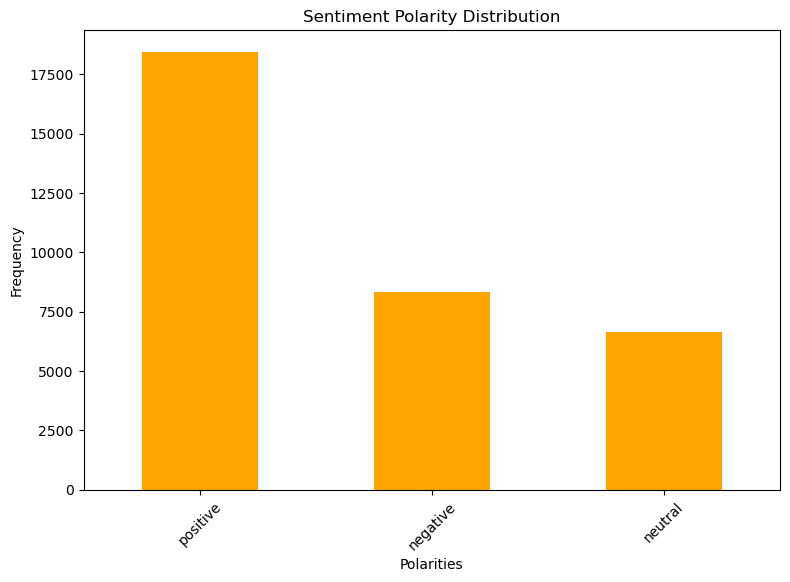

In [19]:
sentiment_polarity = clean_data['sentiment'].value_counts()
plt.figure(figsize=(8,6))
sentiment_polarity.plot(kind='bar', color='orange')
plt.title("Sentiment Polarity Distribution")
plt.xlabel("Polarities")
plt.ylabel("Frequency")
plt.tight_layout()
plt.xticks(rotation=45)
plt.show

Sentiment polarity counts of feature 'sentiment'

In [20]:
print("The total count of different classes of sentiment in - feature sentiment")
clean_data['sentiment'].value_counts()

The total count of different classes of sentiment in - feature sentiment


sentiment
positive    18433
negative     8310
neutral      6653
Name: count, dtype: int64

<b><font color='green'>Inference</font></b><br>

From the above bar plot for the 'sentiment' feature, we can infer that the among the 33396 data samples<br>
- Total 18433 review samples has Positive reviews<br>
- 8310 review samples has Negative reviews<br>
- 6653 review samples has Neutral reviews<br> 

**Plotting a bar plot for visualizing the distribution of the sentiment classes - Positive, Negative, Neutral across the Data samples - rating_sentiment feature derived from rating**

<function matplotlib.pyplot.show(close=None, block=None)>

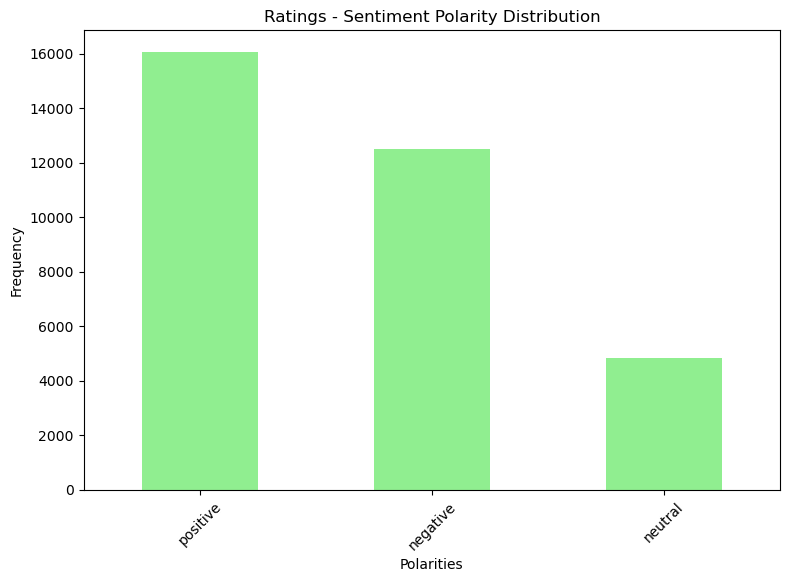

In [21]:
rating_sentiment = clean_data['rating_sentiment'].value_counts()
plt.figure(figsize=(8,6))
rating_sentiment.plot(kind='bar', color='lightgreen')
plt.title("Ratings - Sentiment Polarity Distribution")
plt.xlabel("Polarities")
plt.ylabel("Frequency")
plt.tight_layout()
plt.xticks(rotation=45)
plt.show

In [22]:
rating_sentiment = clean_data['rating_sentiment'].value_counts()
print("The total count of different classes of sentiment in - feature rating_sentiment")
rating_sentiment

The total count of different classes of sentiment in - feature rating_sentiment


rating_sentiment
positive    16061
negative    12517
neutral      4818
Name: count, dtype: int64

<b><font color='green'>Inference</font></b><br>

From the above bar plot for the 'rating_sentiment' feature, we can infer that the among the 33396 data samples<br>
- Total 16061 review samples has Positive reviews<br>
- 12517 review samples has Negative reviews<br>
- 4818 review samples has Neutral reviews<br> 

**Bar plot to analyse and compare the accuarcy of the derived sentiment polarity from Reviews**<br>
This allows us to directly observe how closely the sentiment polarities derived from reviews match those derived from ratings. 

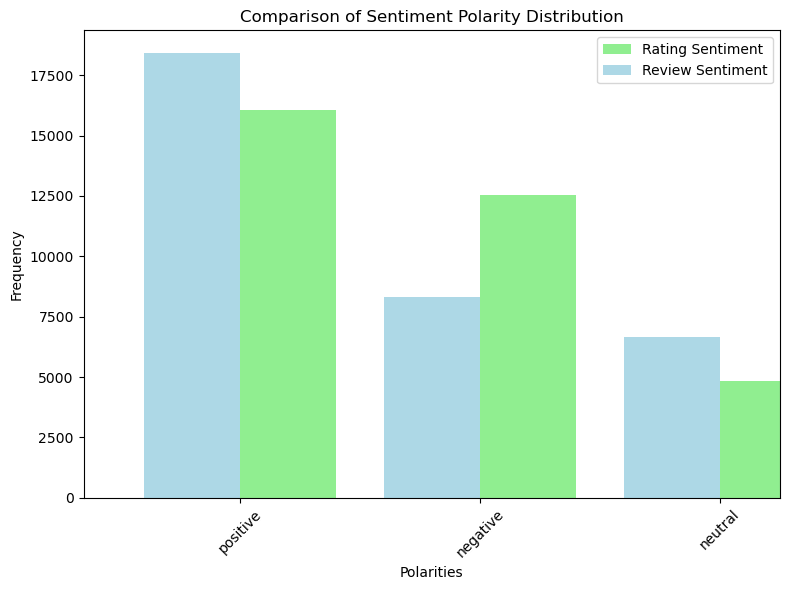

In [23]:
# Assuming you have two columns named 'sentiment1' and 'sentiment2'
rating_sentiment = clean_data['rating_sentiment'].value_counts()
review_sentiment = clean_data['sentiment'].value_counts()
plt.figure(figsize=(8,6))
rating_sentiment.plot(kind='bar', color='lightgreen', position=0, width=0.4, label='Rating Sentiment')
review_sentiment.plot(kind='bar', color='lightblue', position=1, width=0.4, label='Review Sentiment')
plt.title("Comparison of Sentiment Polarity Distribution")
plt.xlabel("Polarities")
plt.ylabel("Frequency")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()
plt.tight_layout()
plt.show()

### Aspect Extraction
Identifying aspects from the reviews. Aspects are typically nouns or noun phrases that represent different aspects of the product or service being reviewed.
Extraction of Aspectes from the review is done using spaCy Library’s pre-trained model ‘en_core_web_sm’.  

We are using POS tagging method to get the aspects from the review. Based on the tags given to the words such as “NOUN” and “PROPN”, extracting the aspect from the review sample. A new feature variable “aspect” is formed using these extracted aspects for each sample. 
<b><font color='red'> Note : This process takes 2 minutes for execution

In [24]:
# Load SpaCy English model
nlp = spacy.load("en_core_web_sm")
# Aspect Extraction using SpaCy
def extract_aspects(review):
    doc = nlp(review)
    aspects = []
    for token in doc:
        if token.pos_ in ["NOUN", "PROPN"]:  # Consider nouns and proper nouns as aspects
            aspects.append(token.text)
    result = ' '.join(aspects)
    return result

# Wrap the DataFrame operation with tqdm to monitor the progress
tqdm.pandas()
clean_data['aspect'] = clean_data['review'].progress_apply(lambda review_aspect: extract_aspects(' '.join(review_aspect)))
print("Aspect extraction Completed")
clean_data

100%|████████████████████████████████████| 33396/33396 [03:18<00:00, 168.36it/s]

Aspect extraction Completed


,review,rating,sentiment_score,sentiment,rating_sentiment,aspect
0,"[look, like, spit, food, normal, transaction, ...",1,"{'neg': 0.0, 'neu': 0.724, 'pos': 0.276, 'comp...",positive,negative,spit food transaction chill whiteclear substan...
1,"[d, mcdonalds, far, food, atmosphere, staff, d...",4,"{'neg': 0.0, 'neu': 0.558, 'pos': 0.442, 'comp...",positive,positive,mcdonalds food atmosphere staff difference exp...
2,"[mobile, order, got, speaker, checked, line, m...",1,"{'neg': 0.122, 'neu': 0.878, 'pos': 0.0, 'comp...",negative,negative,order speaker line leave work app money person...
3,"[mc, crispy, chicken, sandwich, customer, serv...",5,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",neutral,positive,mc crispy chicken sandwich customer service p
4,"[repeat, order, time, drive, manage, mess, sup...",1,"{'neg': 0.233, 'neu': 0.767, 'pos': 0.0, 'comp...",negative,negative,repeat order time drive manage mess meal filet...
...,...,...,...,...,...,...
33391,"[treated, badly]",1,"{'neg': 0.756, 'neu': 0.244, 'pos': 0.0, 'comp...",negative,negative,
33392,"[service, good]",5,"{'neg': 0.0, 'neu': 0.256, 'pos': 0.744, 'comp...",positive,positive,service
33393,"[remove, hunger]",4,"{'neg': 0.667, 'neu': 0.333, 'pos': 0.0, 'comp...",negative,positive,hunger
33394,"[good, lately, expensive]",5,"{'neg': 0.0, 'neu': 0.408, 'pos': 0.592, 'comp...",positive,positive,


**Checking the data for missing values after aspect extraction**

In [25]:
clean_data.isnull().sum()

review              0
rating              0
sentiment_score     0
sentiment           0
rating_sentiment    0
aspect              0
dtype: int64

<b><font color='green'>Inference: </b><br>
    From the above result we observe that there are no missing values present after aspect extraction.


#### Visualizing the overall Top Aspects in Reviews</b>

In [26]:
from collections import Counter
import seaborn as sns
plot_aspect = clean_data['aspect']
plot_aspect = plot_aspect.apply(lambda x: x.split())
top_words = Counter([item for sublist in list(plot_aspect) for item in sublist])
popular_aspects = pd.DataFrame(top_words.most_common(20), columns=['aspect', 'count'])
popular_aspects.style.background_gradient(cmap='Oranges')

,aspect,count
0,food,7841
1,order,7002
2,service,6287
3,mcdonalds,5847
4,time,3449
5,place,3341
6,customer,2402
7,staff,2376
8,people,2039
9,location,1961


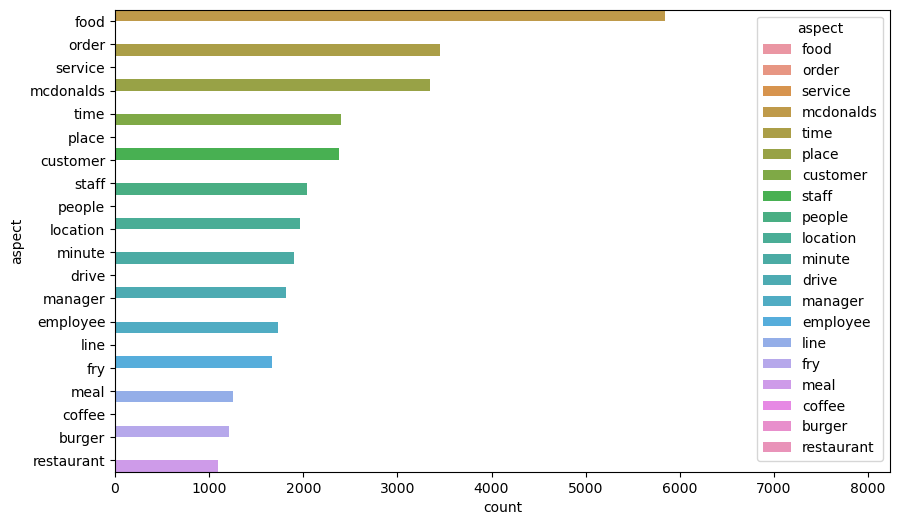

In [27]:
sns.set_palette("deep")
plt.figure(figsize=(10,6))
Common_aspect_plot = sns.barplot(popular_aspects, x='count', y='aspect', hue="aspect", width=10)


<b><font color='green'>Inference: </b><br>
    From the above plot it can be infered that food, order, service are some of the common and top aspects found the customer reviews.

#### Visualizing the Top Aspects with positive sentiment

In [28]:
positive_aspect = clean_data.loc[clean_data['rating_sentiment'] == 'positive'].copy()
# Split the aspect column into lists of words
positive_aspect['aspect_split'] = positive_aspect['aspect'].apply(lambda x: x.split())
# Count the frequency of each word
top_words = Counter([item for sublist in positive_aspect['aspect_split'] for item in sublist])
# Create a DataFrame of the most common words
popular_aspects = pd.DataFrame(top_words.most_common(20), columns=['aspect', 'count'])

# Display the DataFrame with a background gradient
popular_aspects.style.background_gradient(cmap='Greens')

,aspect,count
0,food,3143
1,service,2955
2,mcdonalds,2483
3,place,1519
4,order,1418
5,staff,1060
6,time,901
7,location,705
8,love,624
9,customer,576


#### Visualizing the Top Aspects with Neutral sentiment

In [29]:
positive_aspect = clean_data.loc[clean_data['rating_sentiment'] == 'neutral'].copy()
# Split the aspect column into lists of words
positive_aspect['aspect_split'] = positive_aspect['aspect'].apply(lambda x: x.split())
# Count the frequency of each word
top_words = Counter([item for sublist in positive_aspect['aspect_split'] for item in sublist])
# Create a DataFrame of the most common words
popular_aspects = pd.DataFrame(top_words.most_common(20), columns=['aspect', 'count'])

# Display the DataFrame with a background gradient
popular_aspects.style.background_gradient(cmap='Purples')

,aspect,count
0,food,1136
1,mcdonalds,811
2,order,760
3,service,642
4,time,368
5,place,356
6,staff,296
7,people,290
8,customer,226
9,location,209


#### Visualizing top Aspects with Negative sentiment

In [30]:
positive_aspect = clean_data.loc[clean_data['rating_sentiment'] == 'positive'].copy()
# Split the aspect column into lists of words
positive_aspect['aspect_split'] = positive_aspect['aspect'].apply(lambda x: x.split())
# Count the frequency of each word
top_words = Counter([item for sublist in positive_aspect['aspect_split'] for item in sublist])
# Create a DataFrame of the most common words
popular_aspects = pd.DataFrame(top_words.most_common(20), columns=['aspect', 'count'])

# Display the DataFrame with a background gradient
popular_aspects.style.background_gradient(cmap='Reds')

,aspect,count
0,food,3143
1,service,2955
2,mcdonalds,2483
3,place,1519
4,order,1418
5,staff,1060
6,time,901
7,location,705
8,love,624
9,customer,576


<b><font color='green'>Inference: </b><br>
    From the above data it can be infered that food, order, service are some of the top aspects found the customer reviews for all three kinds of sentiment polarity 

### Model Selection 

The two different machine Learning predictive models are selected for Aspect Based Sentiment Analysis.<br>

#### Multinomial Naive Bayes Classifier 

Multinomial Naive Bayes is known for its simplicity and computational efficiency. It is particularly effective when dealing with large datasets and high-dimensional feature spaces, which is often the case in text classification tasks like sentiment analysis. The model's fast training and prediction times make it a practical choice.<br>

#### Support Vector Machines 

Support Vector Machines are  good at handling complicated patterns. With kernel functions, they can understand relationships between words and sentiment that aren't simple and linear.<br>

### Multinomial Naive Bayes Classifier 

Multinomial Naive Bayes is a solid choice for aspect-based sentiment analysis due to its efficiency and effectiveness with text data. This classifier is particularly well-suited for tasks involving large volumes of text, like reviews, where the frequency of words matters. It's adept at handling the varied vocabulary found in reviews and can efficiently process the occurrence counts of words associated with different aspects.<br> 

In aspect-based sentiment analysis, the goal is to identify and analyze sentiment expressed towards specific aspects or features mentioned in the reviews. By considering the occurrence of words associated with both positive and negative sentiments within each aspect, the model can effectively classify the sentiment polarity for each aspect mentioned in the review.<br>

**Two different cases are considered for Multinomial Naive Bayes Classifier** <br>

**Model1** - MNB Classifier trained using the ‘sentiment’ (sentiment derived from review) target variable.<br>

**Model2** - MNB Classifier trained using the ‘sentiment’ (sentiment derived from rating) target variable.<br> 

### Model 1 - Splitting the Data set
Dividing the x, y into train and test data.<br>
The input feature variable x consists of 'review' and 'aspect' feature variables<br>
The output feature variable y consists of 'sentiment' --> thee sentiment derived from 'review'.<br>
Passing both the review text and aspects extracted from the review to a sentiment analysis model can provide valuable context and enhance the accuracy of sentiment analysis. 

In [31]:
selected_column = ['review','aspect']
x = clean_data[selected_column]
x['review'] = [' '.join(words) for words in x['review']]
# Concatenate the review and aspect columns into a single column
x_combined = x['review'] + x['aspect']
# Convert each list of words into a single string
#x_train_combined_str = [' '.join(words) for words in x_train_combined]
y = clean_data.loc[:,'sentiment']

x_train,x_test,y_train,y_test = train_test_split(x_combined,y,test_size=0.2,random_state=893)

/var/folders/2w/lcgrtls90wz9kn8dsrchm18h0000gq/T/ipykernel_81593/1517923892.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['review'] = [' '.join(words) for words in x['review']]


### Feature Extraction

Feature extraction is performed here for the reviews text. 
Converting the text data of review into numerical feature vectors that can be used as input to the classifier. In this project, we are using a common technique TF-IDF vectorization. <br>

It transforms text documents into numerical vectors based on the frequency of terms (TF) and their inverse document frequency (IDF) before passsing into the model. <br>

In [32]:
#Initialize a TF-IDF vectorizer with English stop words filtering
tfidf_vectorizer = TfidfVectorizer(stop_words='english')

## Case 1:
## Training the Model1 - Naive  Bayes Multinomial Algorithm

<b> Training Naive Bayes Multinomial Algorithm with<br>
    Features Variable --> Review<br>
    Target Variable --> sentiment<br>
    
Please Note:- the target variable "sentiment" used here is the sentiment dervied from the review using Sentiment Intensity Analyser library of Natural Language Processing Tookit's(NLTK) pre-trained model sentiment analyser called "Vader".
     

In [33]:
# Training the model
model = Pipeline([('tfidf', tfidf_vectorizer),('clf', MultinomialNB())])

model.fit(x_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer(stop_words='english')),
                ('clf', MultinomialNB())])

**Testing the Prediction for the test data**

In [34]:
#Testing
prediction = model.predict(x_test)

## Performance Evaluation of the Model1 - Case1(MNB)
### Multinominal Naive Bayes - with target variable as "sentiment" derived from the reviews

<b>1) Accuracy Test </b><br>


In [35]:
print("Accuracy of model1 MNB: {:.2f}%".format(accuracy_score(y_test, prediction) * 100))

Accuracy of model1 MNB: 75.51%


<b>2) Confusion Matrix </b><br>


In [36]:
# Building the confusion matrix
cm = confusion_matrix(y_test, prediction)
print("Confusion Matrix of Model1 MNB:")
print(cm)

Confusion Matrix of Model1 MNB:
[[1022    4  642]
 [  62  373  877]
 [  51    0 3649]]


<b>3) Classification Metric report</b><br>

In [37]:
print("\nClassification Report of Model1 MNB:\n",classification_report(y_test, prediction))


Classification Report of Model1 MNB:
               precision    recall  f1-score   support

    negative       0.90      0.61      0.73      1668
     neutral       0.99      0.28      0.44      1312
    positive       0.71      0.99      0.82      3700

    accuracy                           0.76      6680
   macro avg       0.87      0.63      0.66      6680
weighted avg       0.81      0.76      0.72      6680



<b><font color='green'>Inference for Multinominal Naive Bayes Model 1 Case1 [Target variable as ‘sentiment’ derived from reviews] :</font></b><br>
**Accuracy:**  

Overall, the model correctly predicts 75.51% of the instances in the dataset. 

**Precision:**

The model has high precision for the Neutral class (0.99), indicating that when it predicts an instance as Neutral, it is correct 99% of the time. 

It also has high precision for the Negative class (0.90), indicating a high accuracy of predictions for the Negative class. 

However, the precision for the Positive class is comparatively lower at 0.71, suggesting that some instances predicted as Positive might be incorrect. 

**Recall:**

The model has a high recall for the Positive class (0.99), indicating that it effectively identifies most actual Positive instances. 

Recall for the Negative class is moderate at 0.61, implying that the model identifies about 61% of actual Negative instances. 

Recall for the Neutral class is the lowest at 0.28, indicating that the model misses a significant portion of actual Neutral instances. 

**F1-score:** 

The F1-score balances precision and recall. The Positive class has the highest F1-score (0.82), reflecting a good balance between precision and recall for this class. 

The Negative class also has a reasonably high F1-score (0.73), indicating a decent balance between precision and recall. 

However, the Neutral class has the lowest F1-score (0.44), indicating that the precision and recall for this class are not well-balanced. 

Overall, while the model performs well in predicting the Positive class, it struggles with the Neutral class, which is evident from its lower precision, recall, and F1-score for that class. 

# Prediction test for all sentiment classes - Model1 Case1 (MNB)

### Predicting the sentiment by passing a Negative Review

<b><font color='red'> Testing Review which is "Negative" in nature and filtering the aspects discussed in the review</b><br>

In [38]:
#Function to perform aspect-based sentiment analysis
def aspect_based_sentiment_analysis(review):
    get_aspect = extract_aspects(review)
    review_aspect = list(get_aspect.split(" "))
    predicted_sentiment = model.predict([review])
    return predicted_sentiment[0], review_aspect

# Test aspect-based sentiment analysis
test_review = "I ordered a burger. Taste was Awful. Food tasted bad!!"
sentiment, Aspect = aspect_based_sentiment_analysis(test_review)

# Print aspect-based sentiment output
print("Review :: ", test_review)
print("Aspects Detected in the Review:", Aspect)
print("Predicted sentiment of the Review:", sentiment)

Review ::  I ordered a burger. Taste was Awful. Food tasted bad!!
Aspects Detected in the Review: ['burger', 'Taste', 'Food']
Predicted sentiment of the Review: negative


### Predicting the sentiment by passing a Positive Review

<b><font color='red'> Testing Review which is "Positive" in nature and filtering the aspects discussed in the review</b><br>

In [39]:
#Function to perform aspect-based sentiment analysis
def aspect_based_sentiment_analysis(review):
    get_aspect = extract_aspects(review)
    review_aspect = list(get_aspect.split(" "))
    predicted_sentiment = model.predict([review])
    return predicted_sentiment[0], review_aspect

# Test aspect-based sentiment analysis
test_review = "Food was really nice, the service was quick and good."
sentiment, Aspect = aspect_based_sentiment_analysis(test_review)

# Print aspect-based sentiment output
print("Review :: ", test_review)
print("Aspects Detected in the Review:", Aspect)
print("Predicted sentiment of the Review:", sentiment)

Review ::  Food was really nice, the service was quick and good.
Aspects Detected in the Review: ['Food', 'service']
Predicted sentiment of the Review: positive


### Predicting the sentiment by passing a Neutral Review

<b><font color='red'> Testing Review which is "Neutral" in nature and filtering the aspects discussed in the review</b><br>

In [40]:
#Function to perform aspect-based sentiment analysis
def aspect_based_sentiment_analysis(review):
    get_aspect = extract_aspects(review)
    review_aspect = list(get_aspect.split(" "))
    predicted_sentiment = model.predict([review])
    return predicted_sentiment[0], review_aspect

# Test aspect-based sentiment analysis
test_review = "it was a neutral experience. not worth the hype!!"
sentiment, Aspect = aspect_based_sentiment_analysis(test_review)

# Print aspect-based sentiment output
print("Review :: ", test_review)
print("Aspects Detected in the Review:", Aspect)
print("Predicted sentiment of the Review:", sentiment)

Review ::  it was a neutral experience. not worth the hype!!
Aspects Detected in the Review: ['experience', 'hype']
Predicted sentiment of the Review: neutral


## Case 2:
## Training the model2 - Naive  Bayes Multinomial Algorithm
<b> Training Naive Bayes Multinomial Algorithm with<br>
    Features Variable --> Review<br>
    Target Variable --> rating_sentiment<br>
    
Please Note:- the target variable "rating_sentiment" used here is the sentiment dervied directly from the ratings given by the customers.

<b>Splitting the dataframe to separate the feature and target variables</b><br>
Here in the Case 2 :
We are considering the rating_sentiment as target variable to feed into the machine learning model.

In [41]:
y2 = clean_data.loc[:,'rating_sentiment']

x_train,x_test,y2_train,y2_test = train_test_split(x_combined,y2,test_size=0.2,random_state=893)

In [42]:
tfidf_vectorizer2 = TfidfVectorizer(stop_words='english')
# Training the model
model2 = Pipeline([('tfidf', tfidf_vectorizer),('clf', MultinomialNB())])

#model = make_pipeline(TfidfVectorizer(), MultinomialNB())
model2.fit(x_train, y2_train)

Pipeline(steps=[('tfidf', TfidfVectorizer(stop_words='english')),
                ('clf', MultinomialNB())])

**Testing the Prediction for the test data**

In [43]:
#Testing
prediction2 = model2.predict(x_test)

## Performance Evaluation of the Model2 - Case2 MNB

**1) Accuracy Test**

In [44]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print("Accuracy of model2 MNB: {:.2f}%".format(accuracy_score(y2_test, prediction2) * 100))

Accuracy of model2 MNB: 79.34%


**2) Confusion Matrix**

In [45]:
# Building the confusion matrix
cm2 = confusion_matrix(y2_test, prediction2)
print("Confusion Matrix for Model2:")
print(cm2)

Confusion Matrix for Model2:
[[2238    3  259]
 [ 364  184  419]
 [ 335    0 2878]]


**3) Classification Metric report**

In [46]:
print("\nClassification Report for Model2:\n",classification_report(y2_test, prediction2))


Classification Report for Model2:
               precision    recall  f1-score   support

    negative       0.76      0.90      0.82      2500
     neutral       0.98      0.19      0.32       967
    positive       0.81      0.90      0.85      3213

    accuracy                           0.79      6680
   macro avg       0.85      0.66      0.66      6680
weighted avg       0.82      0.79      0.76      6680



<b><font color='green'>Inference:</b><br>
Multinominal Naive Bayes Model 2 Case2 [Target variable as ‘sentiment’ derived from ratings] : 

**Accuracy:**<br>  

-The model correctly predicts 79.34% of the instances in the dataset.<br> 

**Precision:** 

- The model has high precision for both the Neutral class (0.98) and the Positive class (0.81), indicating high accuracy for these classes.<br> 

- Precision for the Negative class is slightly lower at 0.76, but still reasonably high. 

**Recall:** 

- Recall for the Negative and Positive classes is high (0.90), indicating that the model effectively identifies most actual instances for these classes. 

- However, recall for the Neutral class is notably lower at 0.19, suggesting that the model misses a significant portion of actual Neutral instances. 

**F1-score:** 

- The F1-scores for the Negative and Positive classes are relatively balanced, with scores of 0.82 and 0.85 respectively. 

- However, the Neutral class has a much lower F1-score of 0.32, indicating an imbalance between precision and recall for this class. 

# Prediction test for all sentiment classes - Model2 Case 2(MNB)

### Predicting the sentiment by passing a Negative Review

<b><font color='red'> Testing Review which is "Negative" in nature and filtering the aspects discussed in the review</b><br>

In [47]:
#Function to perform aspect-based sentiment analysis
def aspect_based_sentiment_analysis(review):
    get_aspect = extract_aspects(review)
    review_aspect = list(get_aspect.split(" "))
    predicted_sentiment = model.predict([review])
    return predicted_sentiment[0], review_aspect

# Test aspect-based sentiment analysis
test_review = "Drink was very very bad. I hate this cafe"
sentiment, Aspect = aspect_based_sentiment_analysis(test_review)

# Print aspect-based sentiment output
print("Review :: ", test_review)
print("Aspects Detected in the Review:", Aspect)
print("Predicted sentiment of the Review:", sentiment)

Review ::  Drink was very very bad. I hate this cafe
Aspects Detected in the Review: ['Drink', 'cafe']
Predicted sentiment of the Review: negative


### Predicting the sentiment by passing a Positive Review

<b><font color='red'> Testing Review which is "Positive" in nature and filtering the aspects discussed in the review</b><br>

In [48]:
#Function to perform aspect-based sentiment analysis
def aspect_based_sentiment_analysis(review):
    get_aspect = extract_aspects(review)
    review_aspect = list(get_aspect.split(" "))
    predicted_sentiment = model.predict([review])
    return predicted_sentiment[0], review_aspect

# Test aspect-based sentiment analysis
test_review = "The staff here are very polite. I love this place!!!"
sentiment, Aspect = aspect_based_sentiment_analysis(test_review)

# Print aspect-based sentiment output
print("Review :: ", test_review)
print("Aspects Detected in the Review:", Aspect)
print("Predicted sentiment of the Review:", sentiment)

Review ::  The staff here are very polite. I love this place!!!
Aspects Detected in the Review: ['staff', 'place']
Predicted sentiment of the Review: positive


### Predicting the sentiment by passing a Neutral Review

<b><font color='red'> Testing Review which is "Neutral" in nature and filtering the aspects discussed in the review</b><br>

In [49]:
#Function to perform aspect-based sentiment analysis
def aspect_based_sentiment_analysis(review):
    get_aspect = extract_aspects(review)
    review_aspect = list(get_aspect.split(" "))
    predicted_sentiment = model.predict([review])
    return predicted_sentiment[0], review_aspect

# Test aspect-based sentiment analysis
test_review = "Store needs renovation, it was a neutral experience."
sentiment, Aspect = aspect_based_sentiment_analysis(test_review)

# Print aspect-based sentiment output
print("Review :: ", test_review)
print("Aspects Detected in the Review:", Aspect)
print("Predicted sentiment of the Review:", sentiment)

Review ::  Store needs renovation, it was a neutral experience.
Aspects Detected in the Review: ['Store', 'renovation', 'experience']
Predicted sentiment of the Review: neutral


## Case 3:
## Training the Model3 - Support Vector Machines

In [50]:
tfidf_vectorizer3 = TfidfVectorizer(stop_words='english')
# Training the model
model3 = Pipeline([('tfidf', tfidf_vectorizer3),('svm', SVC(kernel='linear'))])

model3.fit(x_train, y2_train)

Pipeline(steps=[('tfidf', TfidfVectorizer(stop_words='english')),
                ('svm', SVC(kernel='linear'))])

**Testing the Prediction for the test data**

In [51]:
#Testing
prediction3 = model3.predict(x_test)

### Performance Evaluation of the Model3 - SVM

**1) Accuracy Test**

In [52]:
print("Accuracy of model3 - SVM: {:.2f}%".format(accuracy_score(y2_test, prediction3) * 100))

Accuracy of model3 - SVM: 81.29%


**2) Confusion Matrix**

In [53]:
# Building the confusion matrix
cm = confusion_matrix(y_test, prediction3)
print("Confusion Matrix of Model3 SVM:")
print(cm)

Confusion Matrix of Model3 SVM:
[[1507   38  123]
 [ 527  243  542]
 [ 693  159 2848]]


**3) Classification Metric report**

In [54]:
print("\nClassification Report for Model3:\n",classification_report(y_test, prediction3))


Classification Report for Model3:
               precision    recall  f1-score   support

    negative       0.55      0.90      0.69      1668
     neutral       0.55      0.19      0.28      1312
    positive       0.81      0.77      0.79      3700

    accuracy                           0.69      6680
   macro avg       0.64      0.62      0.58      6680
weighted avg       0.70      0.69      0.66      6680



<b><font color='green'>Inference</font></b><br>
Support Vector Machines Model3 [Target variable as ‘sentiment’ derived from ratings] : 

**Accuracy:** <br>

- The model correctly predicts 81.29% of the instances in the dataset. <br>

**Precision:**<br>

- Precision for the Negative and Neutral classes is the same, both at 0.55. <br>

- Precision for the Positive class is higher at 0.81, indicating a higher accuracy 	for this class. <br>

**Recall:** 

- Recall for the Negative class is relatively high at 0.80, indicating that the model effectively identifies a significant portion of actual Negative instances.<br> 

- Recall for the Positive class is also relatively high at 0.77. <br>

- However, recall for the Neutral class is notably lower at 0.19, suggesting that the model misses a large portion of actual Neutral instances. <br>

**F1-score:**<br>

- The F1-score for the Negative class is 0.69, indicating a reasonably balanced performance between precision and recall for this class.<br> 

- The F1-score for the Positive class is 0.79, indicating a good balance between precision and recall. <br>

- However, the F1-score for the Neutral class is low at 0.28, indicating an imbalance between precision and recall for this class. <br>

# Prediction test for all sentiment classes - Model3 (SVM)

### Predicting the sentiment by passing a Negative Review

<b><font color='red'> Testing Review which is "Negative" in nature and filtering the aspects discussed in the review</b><br>

In [55]:
#Function to perform aspect-based sentiment analysis
def aspect_based_sentiment_analysis(review):
    get_aspect = extract_aspects(review)
    review_aspect = list(get_aspect.split(" "))
    predicted_sentiment = model.predict([review])
    return predicted_sentiment[0], review_aspect

# Test aspect-based sentiment analysis
test_review = "Drink was very very bad. I hate this cafe"
sentiment, Aspect = aspect_based_sentiment_analysis(test_review)

# Print aspect-based sentiment output
print("Review :: ", test_review)
print("Aspects Detected in the Review:", Aspect)
print("Predicted sentiment of the Review:", sentiment)

Review ::  Drink was very very bad. I hate this cafe
Aspects Detected in the Review: ['Drink', 'cafe']
Predicted sentiment of the Review: negative


### Predicting the sentiment by passing a Positive Review

<b><font color='red'> Testing Review which is "Positive" in nature and filtering the aspects discussed in the review</b><br>

In [56]:
#Function to perform aspect-based sentiment analysis
def aspect_based_sentiment_analysis(review):
    get_aspect = extract_aspects(review)
    review_aspect = list(get_aspect.split(" "))
    predicted_sentiment = model.predict([review])
    return predicted_sentiment[0], review_aspect

# Test aspect-based sentiment analysis
test_review = "The staff here are very polite. I love this place!!!"
sentiment, Aspect = aspect_based_sentiment_analysis(test_review)

# Print aspect-based sentiment output
print("Review :: ", test_review)
print("Aspects Detected in the Review:", Aspect)
print("Predicted sentiment of the Review:", sentiment)

Review ::  The staff here are very polite. I love this place!!!
Aspects Detected in the Review: ['staff', 'place']
Predicted sentiment of the Review: positive


### Predicting the sentiment by passing a Neutral Review

<b><font color='red'> Testing Review which is "Neutral" in nature and filtering the aspects discussed in the review</b><br>

In [57]:
#Function to perform aspect-based sentiment analysis
def aspect_based_sentiment_analysis(review):
    get_aspect = extract_aspects(review)
    review_aspect = list(get_aspect.split(" "))
    predicted_sentiment = model.predict([review])
    return predicted_sentiment[0], review_aspect

# Test aspect-based sentiment analysis
test_review = "Store needs renovation, neutral experience."
sentiment, Aspect = aspect_based_sentiment_analysis(test_review)

# Print aspect-based sentiment output
print("Review :: ", test_review)
print("Aspects Detected in the Review:", Aspect)
print("Predicted sentiment of the Review:", sentiment)

Review ::  Store needs renovation, neutral experience.
Aspects Detected in the Review: ['Store', 'renovation', 'experience']
Predicted sentiment of the Review: neutral


**Therefore, considering all the above factors, performance and accuracy evaluation selecting Model 2 - Case2 Multinomial Naive Bayes [target variable = sentiments derived from ratings]for the loading into the streamlit Web Application as it has a good accuracy, precision, recall when compared to other models. Inspite, of Support Vector Machines showing an accuracy of 81.29%, it does not have a good precision towards Negative and Positive instances.**

Using Pickle saving this model, to build UI Application for this Model.

In [58]:
import pickle
with open('sentiment_analysis.pkl', 'wb') as file:
    pickle.dump(model2, file)

### Improvement
1) Improving the model by finding out more refined aspects from the reviews. <br>

2) Enhancing the model further, by implementing a new classifier from scratch using the same bayes theorem by including other features along with reviews for having more accurate and precise model to develop the advanced level sentiment analysis <br>

### Web Application developed using Streamlit for Sentiment Scout Project
Application Link : [sentiment_scout](https://sentiment-scout-application.streamlit.app/) <br>
Github Link(for applciation code) : [Applciation code repositary for model](https://github.com/Anvithanm/sentiment-scout) <br>

##### Image of the Web Application
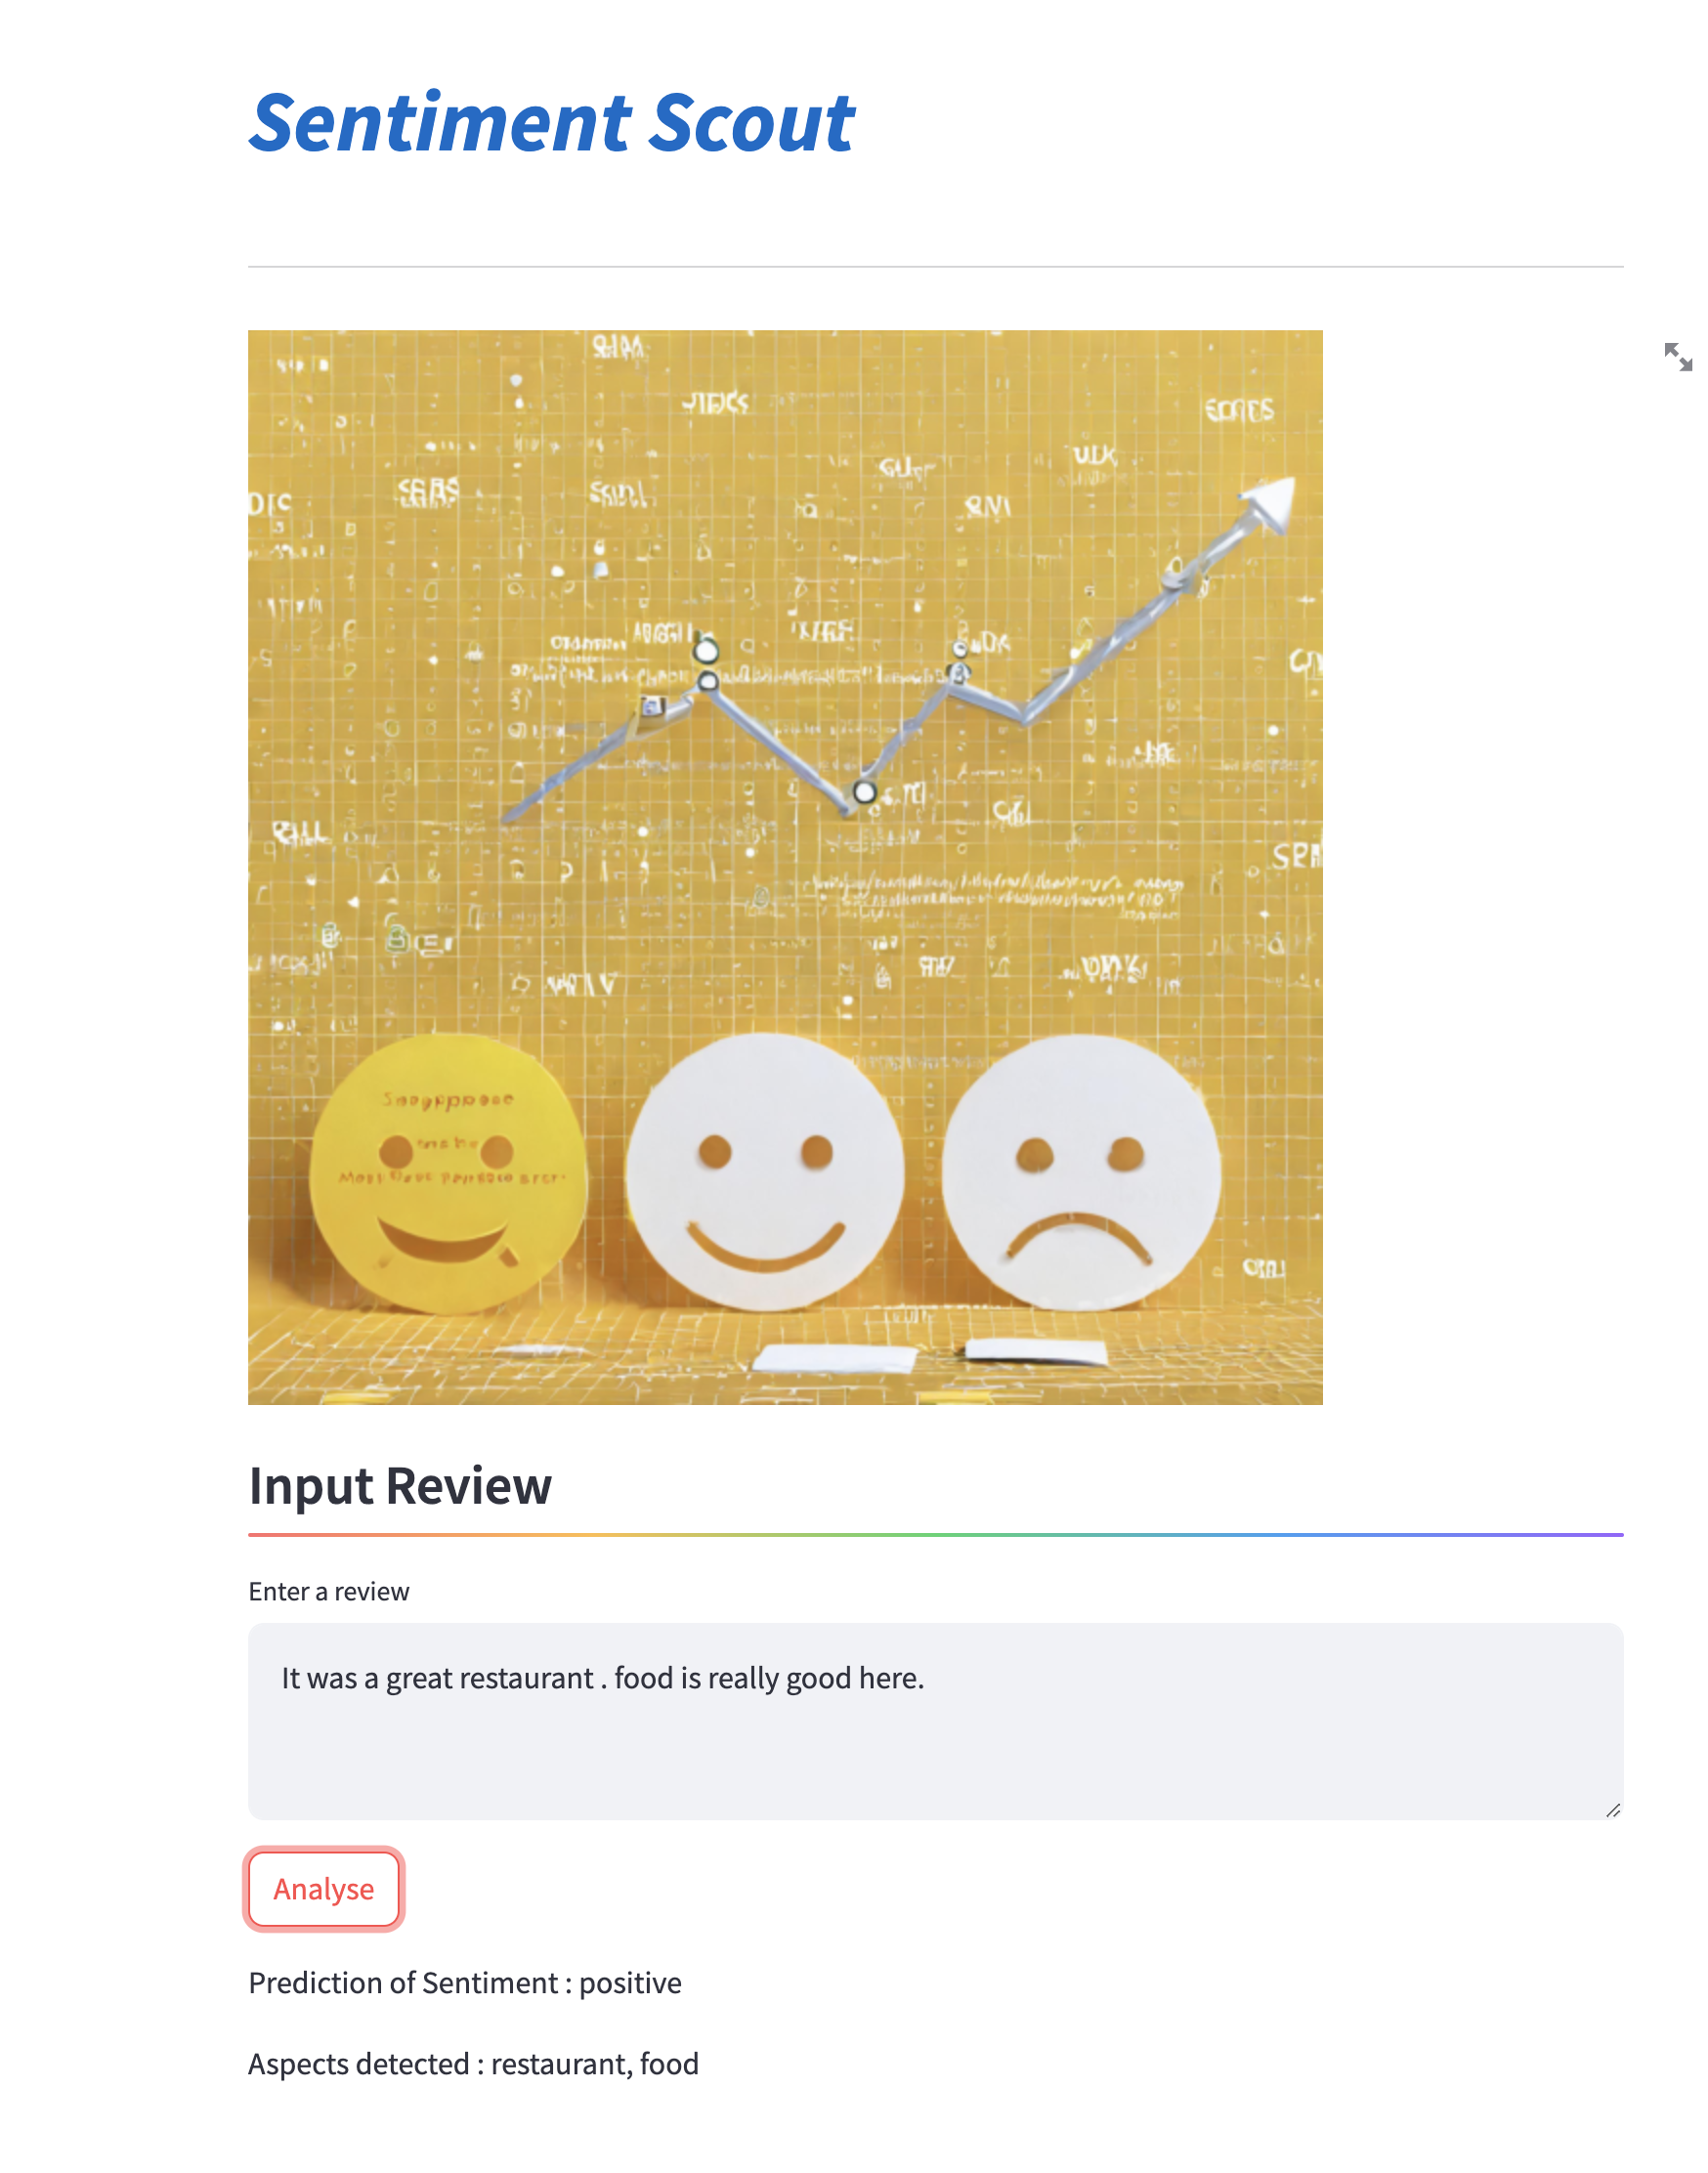

### ACKNOWLEDGMENTS

I would like to express my sincere gratitude to Professor Pramod Gupta for his invaluable guidance, mentorship, and unwavering support throughout the course of this project. His expertise and insightful feedback have been instrumental in shaping the direction and quality of my work. <br>

I am also grateful to Teaching Assistant Kunal Mishra for his assistance, patience, and dedication in providing valuable insights and assistance during the development and execution of this project.<br> 

Furthermore, I extend my appreciation to Northeastern University for providing the resources and environment conducive to academic excellence, fostering an atmosphere of innovation and learning. <br>

### CITATION

1) Dataset: Elgiriyewithana, N. (2023) ‘McDonald’s Store Reviews’. Data Set Link 

2) Geron,A.(2017). Hands-On Machine Learning with Scikit-Learn & TensorFlow(1st Ed.).O'REILLY 

3) Medhat, W., Hassan, A., & Korashy, H. (2014). Sentiment analysis algorithms and applications: A survey. Ain Shams Engineering Journal, 5(4), 1093-1113. https://doi.org/10.1016/j.asej.2014.04.011 

4) I. Perikos and I. Hatzilygeroudis, "Aspect based sentiment analysis in social media with classifier ensembles," 2017 IEEE/ACIS 16th International Conference on Computer and Information Science (ICIS), Wuhan, China, 2017, pp. 273-278, doi: 10.1109/ICIS.2017.7960005. 

5) Syahrul Mubarok, M., A., & Dwi Aldhi, M. (Directors). (2017). Aspect-based Sentiment Analysis to Review Products Using Naïve Bayes . 

6) NLTK :: Sample usage for sentiment. (n.d.-b). https://www.nltk.org/howto/sentiment.html 

7) Pai, A. (2024b, March 17). What is Tokenization in NLP? Here’s All You Need To Know. Analytics Vidhya. https://www.analyticsvidhya.com/blog/2020/05/what-is-tokenization-nlp/ 

8) GeeksforGeeks. (2024, January 3). Removing stop words with NLTK in Python. GeeksforGeeks. https://www.geeksforgeeks.org/removing-stop-words-nltk-python/#removing-stop-words-with-sklearn 

9) NLTK :: nltk.stem.wordnet module. (n.d.). https://www.nltk.org/api/nltk.stem.wordnet.html 

10) GeeksforGeeks. (2024b, March 21). Sklearn  Feature Extraction with TF-IDF. GeeksforGeeks. https://www.geeksforgeeks.org/sklearn-feature-extraction-with-tf-idf/ 

11) Kanika. (2024, April 23). Collecting Feedback Using 1 to 5 Rating Scale Surveys. Measure Customer Satisfaction using Surveys with 1 to 5 Rating Scale. https://www.zonkafeedback.com/blog/collecting-feedback-with-1-to-5-rating-scale-survey 

12) Image for web application generated using Adobe Firefly. (April 16, 2024). 

**END OF PROJECT**